In [12]:
!git log --since="2023-01-01" --pretty=format:%s > commits.txt



In [13]:
import re
from collections import Counter

messages = open('commits.txt', 'r', encoding='utf-8').read().lower()
words = re.findall(r'\b[a-z]+\b', messages)

word_counts = Counter(words)

word_list = list(word_counts.items())  

#sort by freq
word_list.sort(key=lambda x: x[1], reverse=True)

with open("word_counts.txt", "w", encoding="utf-8") as f:
    for word, count in word_list:
        f.write(f"{word},{count}\n")

print(f"Total unique words: {len(word_counts)}")
print("Top 10 most common:")
print(word_counts.most_common(10))

take_out = ['the', 'and', 'to', 'of', 'in', 'a', 'is', 'for', 'on', 'with', 'this', 'that', 'it', 'as', 'by', 'an', 'be', 'are', 'at', 'from', 'or', 'not', 'we', 'but', 'all', 'if', 'have', 'has', 'was', 'were', 'when']
for word in take_out:
    if word in word_counts:
        del word_counts[word]
with open("word_counts_filtered.txt", "w", encoding="utf-8") as f:
    for word, count in word_counts.most_common():
        f.write(f"{word},{count}\n")

print(f"Total unique words after filtering: {len(word_counts)}")
print(word_counts.most_common(10))



Total unique words: 4680
Top 10 most common:
[('fix', 2992), ('in', 1673), ('to', 1667), ('for', 1647), ('add', 1242), ('update', 682), ('and', 665), ('tests', 594), ('the', 586), ('model', 584)]
Total unique words after filtering: 4649
[('fix', 2992), ('add', 1242), ('update', 682), ('tests', 594), ('model', 584), ('docs', 546), ('remove', 419), ('support', 387), ('md', 384), ('test', 330)]


In [14]:

bugfix_keywords = ['fix', 'fixed', 'fixes', 'fixing', 'resolve', 'resolves', 'resolved', 'bug', 'bugs', 'issue', 'issues', 'hotfix', 'crash', 'failure', 'error', 'regression', 'correct', 'corrected']

for word in bugfix_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

bugfix_count = sum(word_counts[word] for word in bugfix_keywords if word in word_counts)
print(f"Total bugfix-related words: {bugfix_count}")

fix: 2992
fixed: 120
fixes: 129
fixing: 31
resolve: 8
resolved: 1
bug: 145
bugs: 17
issue: 138
issues: 48
hotfix: 10
crash: 8
failure: 20
error: 171
regression: 17
correct: 75
corrected: 9
Total bugfix-related words: 3939


In [15]:
refactor_keywords = ['refactor', 'refactored', 'refactoring', 'cleanup', 'cleaned', 'restructure', 'restructured', 'restructuring']
refactor_count = sum(word_counts[word] for word in refactor_keywords if word in word_counts)
print(f"Total refactor-related words: {refactor_count}")
for word in refactor_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

Total refactor-related words: 151
refactor: 107
refactored: 1
refactoring: 9
cleanup: 30
restructure: 4


In [16]:
performance_keywords = ['performance', 'performant', 'speed', 'faster', 'optimize', 'optimized']
performance_count = sum(word_counts[word] for word in performance_keywords if word in word_counts)
print(f"Total performance-related words: {performance_count}")

for word in performance_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

Total performance-related words: 62
performance: 16
speed: 11
faster: 20
optimize: 12
optimized: 3


In [17]:
!git log --since="2023-01-01" --pretty=format:"%ad|||%s" --date=short > commits_with_dates.txt


In [18]:
import datetime
!pip install pandas
import pandas as pd

df = pd.read_csv('commits_with_dates.txt', sep='\\|\\|\\|', names=['date', 'message'], engine='python')

df['date'] = pd.to_datetime(df['date'])

pattern = re.compile(r'\b(' + '|'.join(bugfix_keywords) + r')\b', re.IGNORECASE)
df['is_bugfix'] = df['message'].apply(lambda x: bool(pattern.search(x)))

defect_df = df[df['is_bugfix']]
defects_per_month = defect_df.groupby(defect_df['date'].dt.to_period('M')).size()

defects_per_month = defects_per_month.reset_index(name='defect_count')
defects_per_month['date'] = defects_per_month['date'].dt.to_timestamp()

print(defects_per_month)



         date  defect_count
0  2023-01-01            85
1  2023-02-01            90
2  2023-03-01           114
3  2023-04-01            82
4  2023-05-01           107
5  2023-06-01           100
6  2023-07-01            77
7  2023-08-01            87
8  2023-09-01            78
9  2023-10-01           109
10 2023-11-01            82
11 2023-12-01            92
12 2024-01-01            71
13 2024-02-01            70
14 2024-03-01            89
15 2024-04-01           119
16 2024-05-01            83
17 2024-06-01            73
18 2024-07-01            88
19 2024-08-01            79
20 2024-09-01            90
21 2024-10-01           111
22 2024-11-01            67
23 2024-12-01            63
24 2025-01-01            89
25 2025-02-01            90
26 2025-03-01           118
27 2025-04-01           134
28 2025-05-01           102
29 2025-06-01           132
30 2025-07-01           143
31 2025-08-01           149
32 2025-09-01           137
33 2025-10-01           129
34 2025-11-01       


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


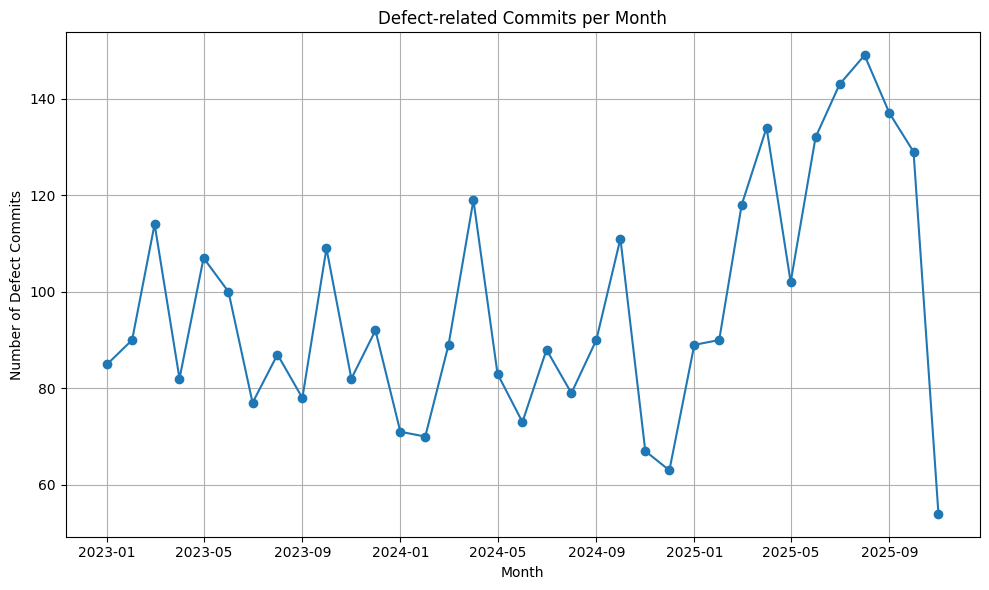

In [19]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(defects_per_month['date'], defects_per_month['defect_count'], marker='o')
plt.title('Defect-related Commits per Month')
plt.xlabel('Month')
plt.ylabel('Number of Defect Commits')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:

#run on git bash or linux otherwise uniq will not be recognized
!git log --pretty=format: --name-only | sort | uniq -c | sort -rg | head -2 >  top_files.txt



"uniq" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [21]:
f =  open('top_files.txt', 'r', encoding='utf-8')
for line in f:
    print(line.strip())
f.close()

21110
988 src/transformers/__init__.py
923 src/transformers/trainer.py
897 src/transformers/modeling_utils.py
701 README.md
594 setup.py
554 tests/test_modeling_common.py
479 src/transformers/models/auto/modeling_auto.py
464 src/transformers/training_args.py
458 docs/source/en/_toctree.yml


In [22]:
!git log --date=short --pretty=format:"%ad|||%s" -- src/transformers/__init__.py > init_file_commits.txt


In [23]:
df = pd.read_csv('init_file_commits.txt', sep='\\|\\|\\|', names=['date', 'message'], engine='python')

df['date'] = pd.to_datetime(df['date'])

pattern = re.compile(r'\b(' + '|'.join(bugfix_keywords) + r')\b', re.IGNORECASE)
df['is_bugfix'] = df['message'].apply(lambda x: bool(pattern.search(x)))

defect_df = df[df['is_bugfix']]
defects_per_month = defect_df.groupby(defect_df['date'].dt.to_period('M')).size()

defects_per_month = defects_per_month.reset_index(name='defect_count')
defects_per_month['date'] = defects_per_month['date'].dt.to_timestamp()

print(defects_per_month)

         date  defect_count
0  2020-03-01             1
1  2020-07-01             1
2  2020-08-01             1
3  2020-09-01             1
4  2020-11-01             4
5  2020-12-01             1
6  2021-03-01             3
7  2021-09-01             1
8  2021-11-01             1
9  2021-12-01             2
10 2022-02-01             1
11 2022-04-01             1
12 2022-05-01             2
13 2022-09-01             2
14 2022-11-01             4
15 2023-01-01             1
16 2023-03-01             2
17 2023-07-01             2
18 2024-05-01             1
19 2024-07-01             2
20 2024-09-01             1
21 2024-10-01             1
22 2024-11-01             1
23 2025-01-01             1
24 2025-09-01             2
25 2025-10-01             2


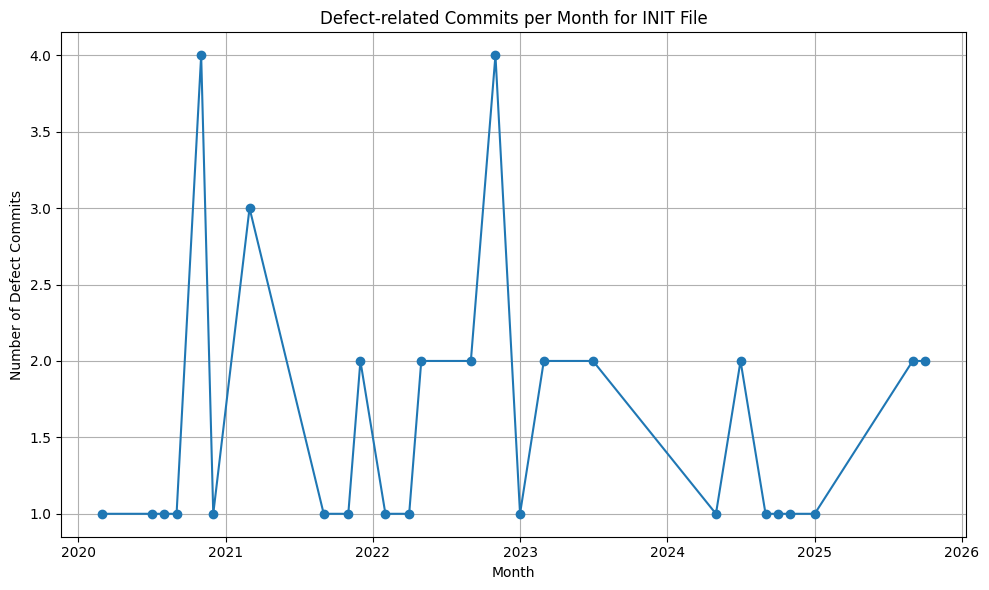

In [25]:
plt.figure(figsize=(10,6))
plt.plot(defects_per_month['date'], defects_per_month['defect_count'], marker='o')
plt.title('Defect-related Commits per Month for INIT File')
plt.xlabel('Month')
plt.ylabel('Number of Defect Commits')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
!git log --date=short --pretty=format:"%ad|||%s" -- src/transformers/trainer.py > trainer_file_commits.txt

In [27]:
df = pd.read_csv('trainer_file_commits.txt', sep='\\|\\|\\|', names=['date', 'message'], engine='python')

df['date'] = pd.to_datetime(df['date'])

pattern = re.compile(r'\b(' + '|'.join(bugfix_keywords) + r')\b', re.IGNORECASE)
df['is_bugfix'] = df['message'].apply(lambda x: bool(pattern.search(x)))

defect_df = df[df['is_bugfix']]
defects_per_month = defect_df.groupby(defect_df['date'].dt.to_period('M')).size()

defects_per_month = defects_per_month.reset_index(name='defect_count')
defects_per_month['date'] = defects_per_month['date'].dt.to_timestamp()

print(defects_per_month)

         date  defect_count
0  2020-04-01             1
1  2020-05-01             4
2  2020-06-01             1
3  2020-07-01             2
4  2020-08-01             6
..        ...           ...
61 2025-06-01             7
62 2025-07-01             5
63 2025-08-01             5
64 2025-09-01            10
65 2025-10-01             4

[66 rows x 2 columns]


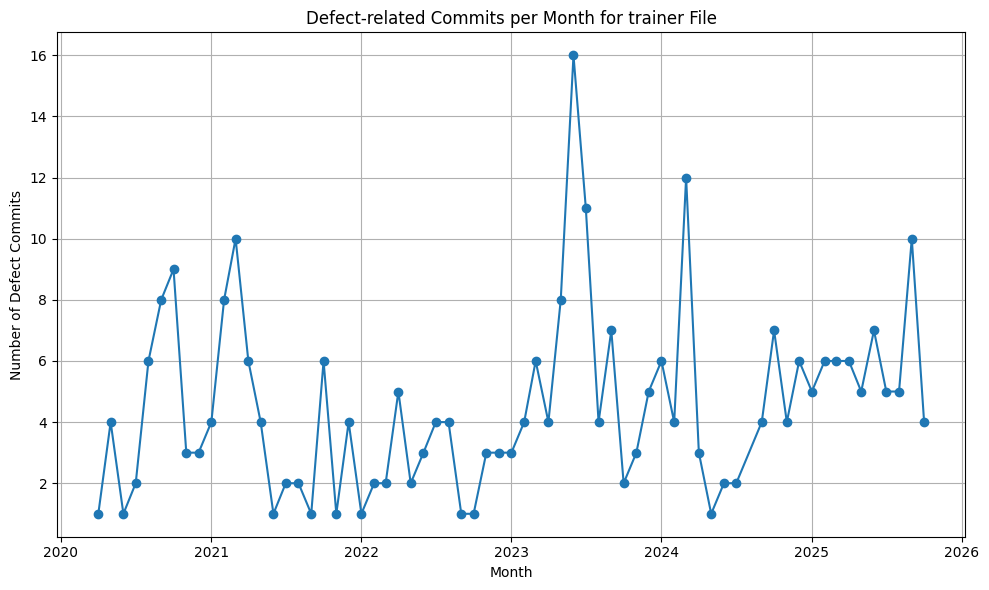

In [29]:
plt.figure(figsize=(10,6))
plt.plot(defects_per_month['date'], defects_per_month['defect_count'], marker='o')
plt.title('Defect-related Commits per Month for trainer File')
plt.xlabel('Month')
plt.ylabel('Number of Defect Commits')
plt.grid(True)
plt.tight_layout()
plt.show()